<a href="https://colab.research.google.com/github/Hkhero79/Hk-yes-bank-stock-closing-price-prediction/blob/main/Hk_Yes_bank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [6]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv('/content/drive/MyDrive/Hk capstone project 2/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [9]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [10]:
df.shape

(185, 5)

In [11]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [13]:
df_yes=df.copy()

In [14]:
#checking null values
df_yes.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [15]:
#checking duplicate values
df_yes[df_yes.duplicated()].shape

(0, 5)

In [16]:
#converting date into datetime yyyy-dd-mm
from datetime import datetime
df_yes['Date'] = df_yes['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [17]:
#introducing new features of name yearintroducing new features of name year
df_yes['Year'] = df_yes['Date'].apply(lambda z: z.strftime('%Y'))['Year'] = df_yes['Date'].apply(lambda z: z.strftime('%Y'))

In [18]:
#changing datatypes of features Month and Year
df_yes['Year'] = df_yes['Year'].astype(int)

In [19]:
df_yes.head()

,Date,Open,High,Low,Close,Year
0,2005-07-01,13.00,14.00,11.25,12.46,2005
1,2005-08-01,12.58,14.88,12.55,13.42,2005
2,2005-09-01,13.48,14.87,12.27,13.30,2005
3,2005-10-01,13.20,14.47,12.40,12.99,2005
4,2005-11-01,13.35,13.88,12.88,13.41,2005


In [20]:

indep_var=df_yes[['High','Low','Open']]
dep_var=df_yes['Close']

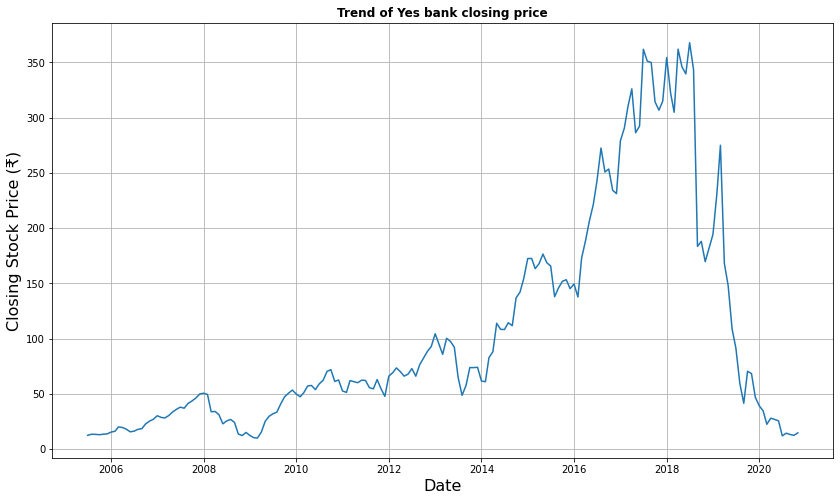

In [21]:
# trend of dependent variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold')
plt.plot(df_yes['Date'],df_yes['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price (₹)',fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

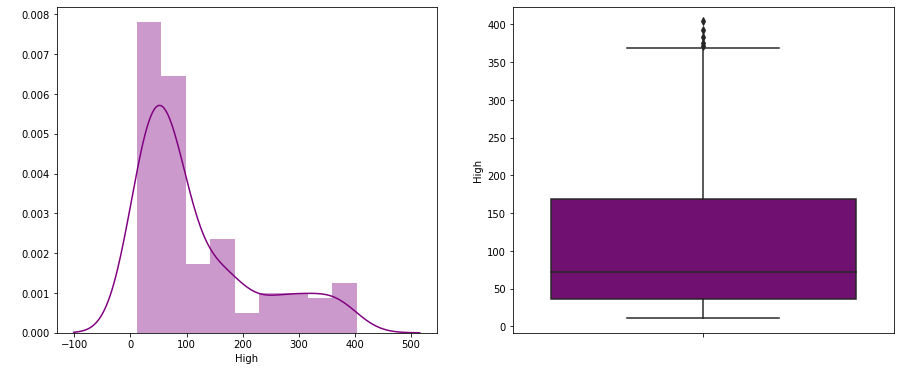

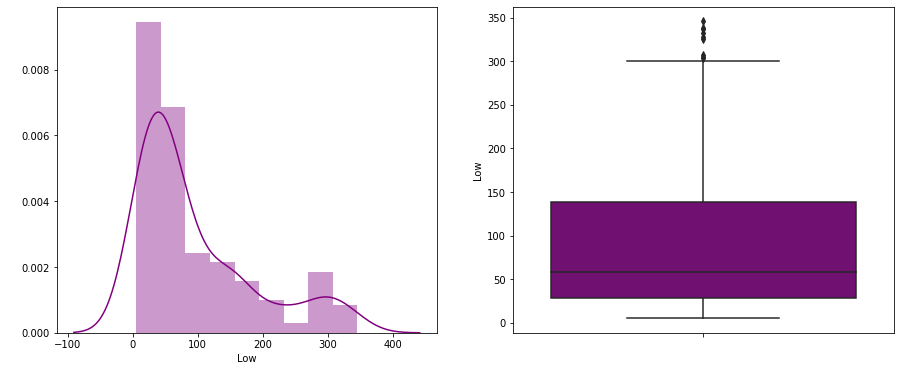

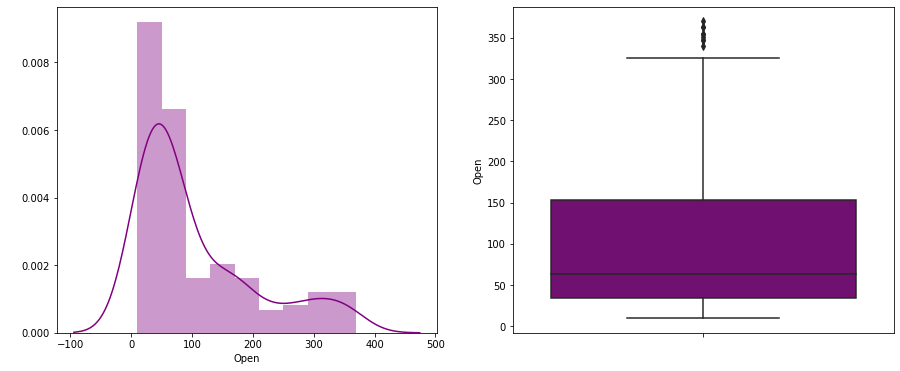

In [22]:
#plot for independent variable
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df_yes[var],color='purple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df_yes[var],color='purple')
    fig.set_title('')
    fig.set_ylabel(var)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Open')

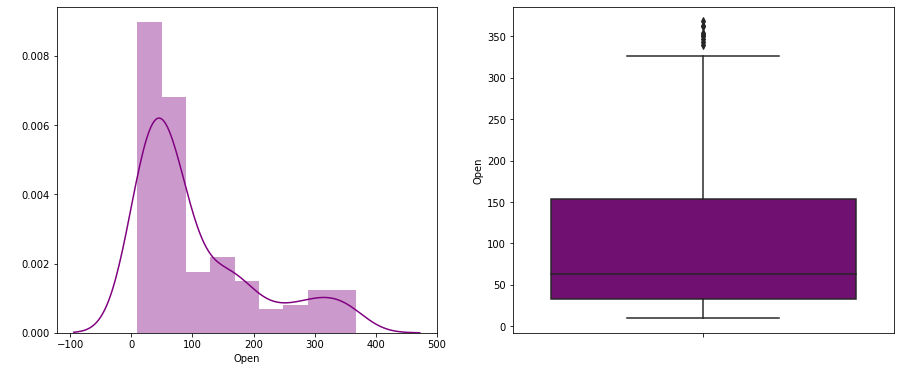

In [23]:
#plots for dependent variable
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df_yes['Close'],color='purple')
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df_yes['Close'],color='purple')
fig.set_title('')
fig.set_ylabel(var)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

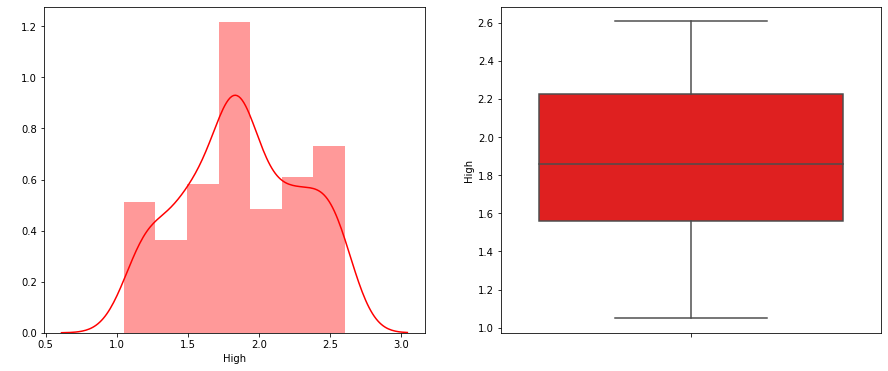

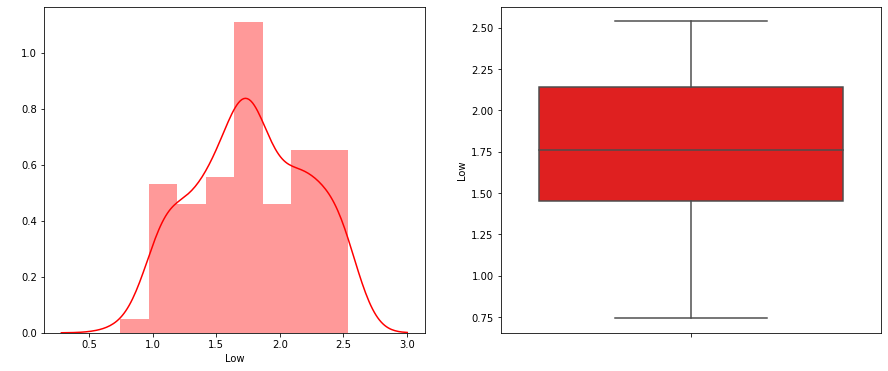

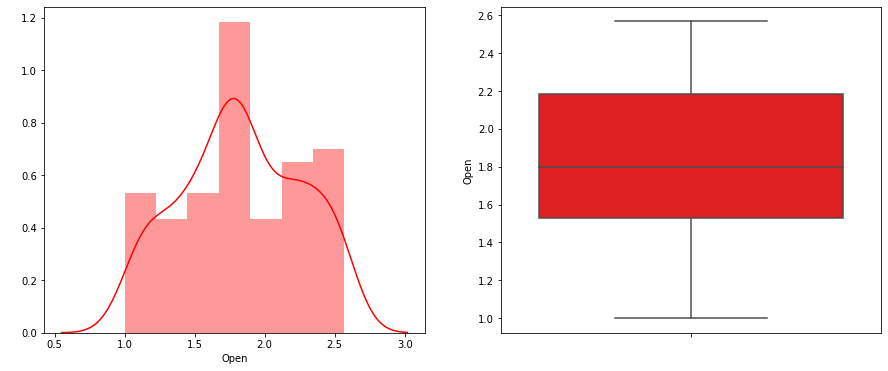

In [24]:
#plot for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df_yes[var]),color='red')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df_yes[var]),color='red')
    fig.set_title('')
    fig.set_ylabel(var)

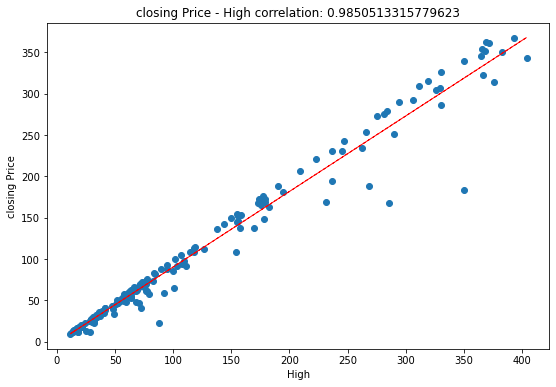

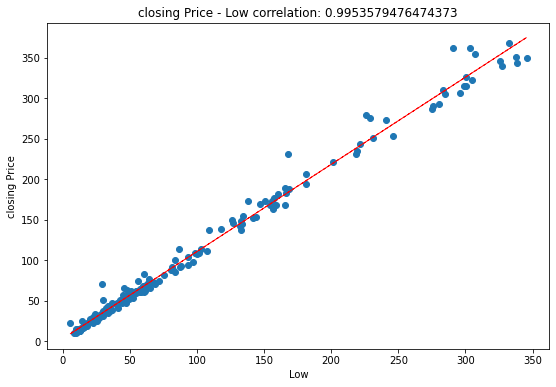

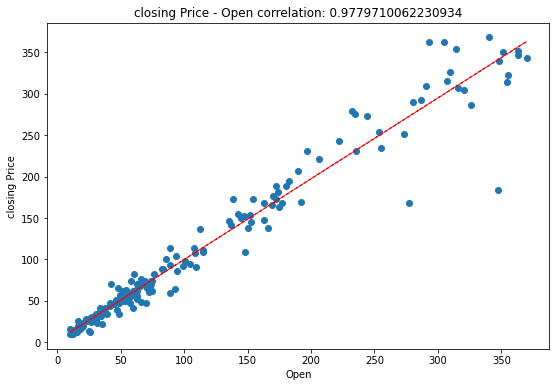

In [25]:
#checking the correlation
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df_yes[col]
   label = df_yes['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df_yes[col], df_yes['Close'], 1)
   y_hat = np.poly1d(z)(df_yes[col])
 
   plt.plot(df_yes[col], y_hat, "r--", lw=1)
 
plt.show()

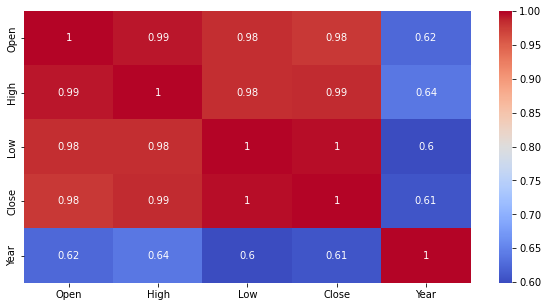

In [26]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df_yes.corr(), annot = True, cmap='coolwarm')
plt.show()


In [27]:
#adding average column
df_yes['Average'] = (df_yes['Low'] + df_yes['High'])/2

In [28]:
#adding month column
df_yes['Month'] = df_yes['Date'].apply(lambda y: y.strftime('%m'))
df_yes['Month'] = df_yes['Month'].astype(int)

In [29]:
#nchecking whether the columns are added or not
df_yes.head()

,Date,Open,High,Low,Close,Year,Average,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,12.625,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,13.715,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,13.570,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,13.435,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,13.380,11


In [30]:
#VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
calc_vif(df_yes[[i for i in df_yes.describe().columns if i not in ['Date']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Open,289.147313
1,High,inf
2,Low,inf
3,Close,444.244929
4,Year,6.365557
5,Average,inf
6,Month,4.777475


In [32]:
calc_vif(df_yes[[i for i in df_yes.describe().columns if i not in ['Date','Close','Month']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Open,175.772464
1,High,inf
2,Low,inf
3,Year,2.246542
4,Average,inf


**We can see from the table  that vif is very high in high,low and average so we will try to drop one of them**

In [33]:
calc_vif(df_yes[[i for i in df_yes.describe().columns if i not in ['Date','Close','Month','High']]])

,variables,VIF
0,Open,175.772464
1,Low,250.255229
2,Year,2.246542
3,Average,584.964887


** looking at the above table we have to drop feature with high vif**

In [34]:
calc_vif(df_yes[[i for i in df_yes.describe().columns if i not in ['Date','Close','Month','High','Average']]])

,variables,VIF
0,Open,67.510494
1,Low,65.730608
2,Year,2.154678


In [35]:
calc_vif(df_yes[[i for i in df_yes.describe().columns if i not in ['Date','Close','Month','High','Low','Open']]])

,variables,VIF
0,Year,2.163487
1,Average,2.163487


*Now we have VIF less than 5 which is good but we drop too many features which can lead to wrong prediction but first of all we'll train our model with these 2 features.

Here we have only 5 features and we have to give prediction on the basis of 4 features and we cannot drop any feature because each vaiable is important in perspective of regression analysis.

Despite having high VIF(variance inflation factor) which means high collinearity in our independent dataset we cannot drop any of them.

We'll move forward with these feature

**LINEAR REGRESSION**

In [36]:
#install scipy
!pip install scipy


In [37]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore
X = df_yes[['Average','Year']].apply(zscore)

In [38]:
#applying log on dependent variable 
y = np.log10(df_yes['Close'])

In [39]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(148, 2)
(37, 2)
(37,)
(148,)


In [40]:
# Fitting Linear Regression to the Training set
reg = LinearRegression().fit(x_train, y_train)

In [41]:
reg.score(x_train, y_train)

0.8183822093093802

In [42]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

In [43]:
#predictions
y_pred = reg.predict(x_test)

In [44]:
#evaluation metrics

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.028962712059118344
RMSE : 0.17018434727999618
R2 : 0.8372880181908819
Adjusted R2 :  0.8277167251432868


In [45]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"R2"]=round(R2,2)
error_df.loc[i,"Adjusted R2"]=round(Adjusted_R2,2)
i=i+1

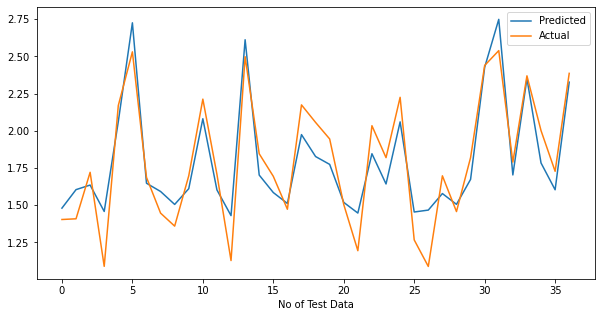

In [46]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**LASSO REGRESSION**

In [47]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [48]:
#checking thhe score of model
lasso.score(x_train, y_train)

0.8183821489676801

In [49]:
#Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [50]:
# finding the best alpha value
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03595841683460081


In [51]:
#prediction
y_pred = lasso_regressor.predict(x_test)

In [52]:
#evaluation metrics

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.029656283700517014
RMSE : 0.17220999884012836
R2 : 0.833391545510139
Adjusted R2 :  0.8235910481872061


In [53]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,'R2']=round(R2,2)
error_df.loc[i,'Adjusted R2']=round(Adjusted_R2,2)

i=i+1

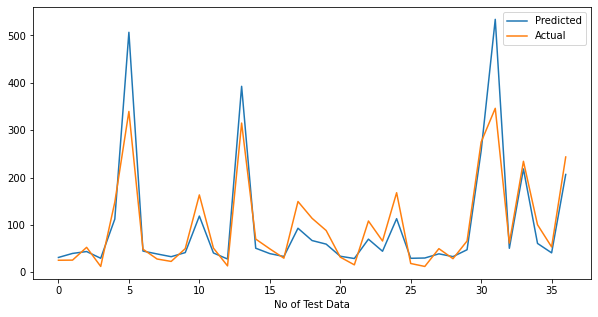

In [54]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(10**y_pred)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**RIDGE REGRESSION**

In [55]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [56]:
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,6,7,10,20,30,40,45,50]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 6, 7, 10, 20, 30, 40, 45,
                                   50]},
             scoring='neg_mean_squared_error')

In [57]:
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 6, 7, 10, 20, 30, 40, 45,
                                   50]},
             scoring='neg_mean_squared_error')

In [58]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 6}

Using  {'alpha': 6}  the negative mean squared error is:  -0.035722454073760485


In [59]:
#Prediction
y_pred = ridge_regressor.predict(x_test)

In [60]:
#evaluation metrics


MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.02895448506996514
RMSE : 0.1701601747471045
R2 : 0.8373342372641065
Adjusted R2 :  0.8277656629855246


In [61]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,'R2']=round(R2,2)
error_df.loc[i,'Adjusted R2']=round(Adjusted_R2,2)
i=i+1

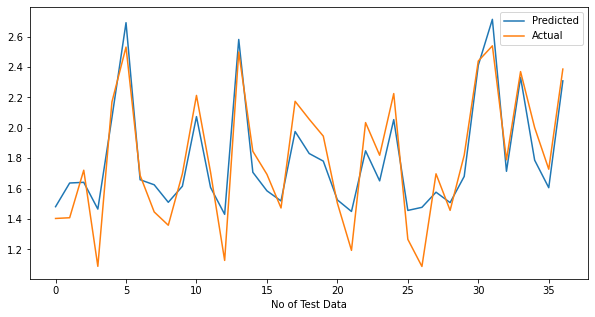

In [62]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [63]:
#fitting data
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [64]:
y_pred = elasticnet.predict(x_test)

In [65]:
# Cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.835e-03, tolerance: 2.175e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -0.03594573808554047


In [67]:
#Prediction
y_pred_elastic = elastic_regressor.predict(x_test)

In [68]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.02933603262487043
RMSE : 0.1712776477677996
R2 : 0.8351907101425323
Adjusted R2 :  0.8254960460332695


In [69]:
#Inserting evalution value in dataframe
error_df.loc[i,"Model_Name"]='Elasticnet regression'
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,'R2']=round(R2,2)
error_df.loc[i,'Adjusted R2']=round(Adjusted_R2,2)
i=i+1

i=i+1

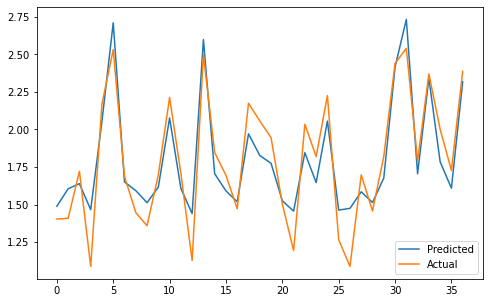

In [70]:
#actual-predicted values plot
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [71]:
#sorting metrics
error_df.sort_values(by=['MSE'],ascending=True,inplace=True)

In [72]:
error_df

,Model_Name,MSE,RMSE,R2,Adjusted R2
0,Linear regression,0.03,0.17,0.84,0.83
1,Lasso regression,0.03,0.17,0.83,0.82
2,Ridge regression,0.03,0.17,0.84,0.83
3,Elasticnet regression,0.03,0.17,0.84,0.83


**CONCLUSION**

**Independent variable are highly correalated**

**The target variable is highly dependent on input variables.**

**we have perform VIF to reduce multicollinearity**

**Linear regression gives result with the acuuracy of 80%**

**lasso and ridge regression give accuracy of 80%**

**Elasticnet regression give accuracy of 80%**


